In [1]:
import pandas as pd
import IPython.display as display
from PIL import Image

In [2]:
df = pd.read_table("D:\\Small Projects\\Automata-Project\\Automata-Project.txt")
print(df)

        Cities Code
0   PK-Khi-00000001
1   PK-Khi-00000011
2   PK-Khi-00000111
3   PK-Khi-00001111
4   PK-Khi-00011111
5   PK-Lhr-00000011
6   PK-Isl-00000111
7   PK-Psh-00001111
8   PK-Hyd-00011111
9   PK-Sad-00111111
10  PK-Rwl-01111111
11  PK-Mul-11111111
12  PK-Lar-11000000
13  PK-Mor-10000000
14  IN-Mum-00000001
15  IN-Del-00000011
16  IN-kol-00000111
17  IN-Raj-00001111
18  IN-Chn-00011111
19  SA-Cap-00000001
20  SA-Dur-00000011
21  SA-Jhn-00000111
22  SA-Tem-00001111
23  SA-Pre-00011111
24  US-New-00000001
25  US-Chi-00000011
26  US-Los-00000111
27  US-San-00001111
28  US-Hou-00011111


In [3]:
class Mealy(object):

    def __init__(self, states, input_alphabet, output_alphabet, transitions, initial_state):

        self.states = states
        self.input_alphabet = input_alphabet
        self.output_alphabet = output_alphabet
        self.transitions = transitions
        self.initial_state = initial_state

    def get_output_from_string(self, string):

        temp_list = list(string)
        current_state = self.initial_state
        output = ''
        for x in temp_list:
            output += self.transitions[current_state][x][1]
            current_state = self.transitions[current_state][x][0]

        return output

    def convert_to_moore(self):
        moore_transitions = {}
        temp_list = []
        moore_output_table = {}
        moore_initial_state = self.initial_state
        for x in self.transitions.keys():
            for a in self.input_alphabet:
                temp_list.append(self.transitions[x][a])

        temp_list_2 = []
        for x in temp_list:
            for y in temp_list:
                if x[0] == y[0] and x[1] != y[1]:
                    if x not in temp_list_2 and y not in temp_list_2:
                        temp_list_2.append(x)
                        temp_list_2.append(y)

        temp_list_3 = []
        for x in temp_list_2:
            if x[0] not in temp_list_3:
                temp_list_3.append(x[0])

        if self.initial_state in temp_list_3:
            moore_initial_state = self.initial_state + self.output_alphabet[0]

        for x in temp_list_2:
            for a in self.input_alphabet:
                if self.transitions[x[0]][a][0] in temp_list_3:
                    next_state = self.transitions[x[0]][a][0]
                    output = self.transitions[x[0]][a][1]

                    next_state = next_state + output
                    try:
                        moore_transitions[x[0] + x[1]][a] = next_state
                    except KeyError as e:
                        moore_transitions[x[0] + x[1]] = {}
                        moore_transitions[x[0] + x[1]][a] = next_state

                    if next_state not in moore_output_table.keys():
                        moore_output_table[next_state] = output

                else:
                    try:
                        moore_transitions[x[0] + x[1]][a] = self.transitions[x[0]][a][0]
                    except KeyError as e:
                        moore_transitions[x[0] + x[1]] = {}
                        moore_transitions[x[0] + x[1]][a] = self.transitions[x[0]][a][0]

                    if moore_transitions[x[0] + x[1]][a] not in moore_output_table.keys():
                        moore_output_table[moore_transitions[x[0] + x[1]][a]] = self.transitions[x[0]][a][1]

        for x in self.transitions.keys():
            if x not in moore_transitions.keys() and x not in temp_list_3:
                for a in self.input_alphabet:
                    if self.transitions[x][a][0] in temp_list_3:
                        next_state = self.transitions[x][a][0]
                        output = self.transitions[x][a][1]

                        next_state = next_state + output
                        try:
                            moore_transitions[x][a] = next_state
                        except KeyError as e:
                            moore_transitions[x] = {}
                            moore_transitions[x][a] = next_state

                        if next_state not in moore_output_table.keys():
                            moore_output_table[next_state] = output

                    else:
                        try:
                            moore_transitions[x][a] = self.transitions[x][a][0]
                        except KeyError as e:
                            moore_transitions[x] = {}
                            moore_transitions[x][a] = self.transitions[x][a][0]

                        if self.transitions[x][a][0] not in moore_output_table.keys():
                            moore_output_table[self.transitions[x][a][0]] = self.transitions[x][a][1]

        moore_states = []
        for s in moore_transitions.keys():
            if s not in moore_states:
                moore_states.append(s)

        from automata.fa.Moore import Moore

        moore_from_mealy = Moore(
            moore_states,
            self.input_alphabet,
            self.output_alphabet,
            moore_transitions,
            moore_output_table,
            moore_initial_state
        )

        print(moore_from_mealy)

    def __str__(self):
        output = "\nMealy Machine" + \
                 "\nStates " + str(self.states) + \
                 "\nTransitions " + str(self.transitions) + \
                 "\nInital State " + str(self.initial_state) + \
                 "\nInital Alphabet " + str(self.input_alphabet) + \
                 "\nOutput Alphabet" + str(self.output_alphabet)

        return output


mealy = Mealy(
    ['a', 'b', 'c', 'd'],
    ['0', '1'],
    ['0', '1'],
    {
        'a': {
            '0': ('d', '1'),
            '1': ('b', '0')
        },
        'b': {
            '0': ('a', '1'),
            '1': ('d', '1')
        },
        'c': {
            '0': ('c', '0'),
            '1': ('c', '0')
        },
        'd': {
            '0': ('b', '0'),
            '1': ('a', '1')
        }
    },
    'a'
)
mealy_2 = Mealy(['q0'],
                ['0', '1'],
                ['0', '1'],
                {
                    'q0': {
                        '1': ('q0', '0'),
                        '0': ('q0', '1')
                    }
                },
                'q0'
                )


============================ Mealy Machine 1 ==============================================

Mealy Machine
States ['q0']
Transitions {'q0': {'1': ('q0', '0'), '0': ('q0', '1')}}
Inital State q0
Inital Alphabet ['0', '1']
Output Alphabet['0', '1']



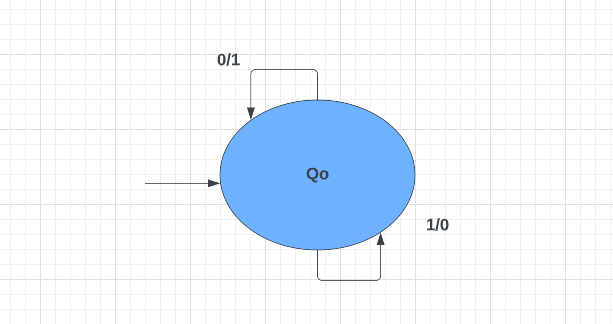

In [4]:
print("============================ Mealy Machine 1 ==============================================")
print(mealy_2)
print()

display.display(Image.open('1.png'))

============================ Mealy Machine 2 ==============================================

Mealy Machine
States ['a', 'b', 'c', 'd']
Transitions {'a': {'0': ('d', '1'), '1': ('b', '0')}, 'b': {'0': ('a', '1'), '1': ('d', '1')}, 'c': {'0': ('c', '0'), '1': ('c', '0')}, 'd': {'0': ('b', '0'), '1': ('a', '1')}}
Inital State a
Inital Alphabet ['0', '1']
Output Alphabet['0', '1']



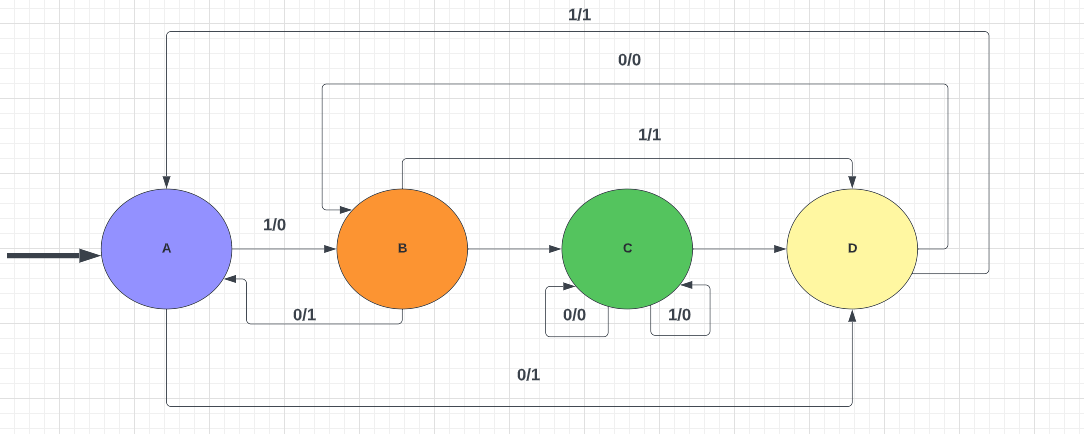

In [5]:
print("============================ Mealy Machine 2 ==============================================")
print(mealy)
print()

display.display(Image.open('2.png'))

======================================================= Mealy Machine 3 ===================================================

Mealy Machine
States ['PK-Khi-00000001', 'PK-Isl-00000001', 'PK-lhr-00000001', 'PK-mul-00000001', 'US-New-00000001', 'PK-Psh-00001111', 'invalid code']
Transitions {'PK-Khi-00000001': {'0': ('PK-Khi-00000001', 'correct code'), '1': ('PK-Isl-00000001', 'incorrect code')}, 'PK-Isl-00000001': {'0': ('PK-Isl-00000001', 'correct code'), '1': ('PK-lhr-00000001', 'incorrect code')}, 'PK-lhr-00000001': {'0': ('PK-lhr-00000001', 'correct code'), '1': ('PK-mul-00000001', 'incorrect code')}, 'PK-mul-00000001': {'0': ('PK-mul-00000001', 'correct code'), '1': ('US-New-00000001', 'incorrect code')}, 'US-New-00000001': {'0': ('PK-Psh-00001111', 'correct code'), '1': ('invalid Code', 'incorrect code')}, 'invalid code': {'0': ('invalid code', 'incorrect code'), '1': ('Invalid Code', 'incorrect code')}}
Inital State PK-Khi-00000001
Inital Alphabet ['0', '1']
Output Alphabet['corre

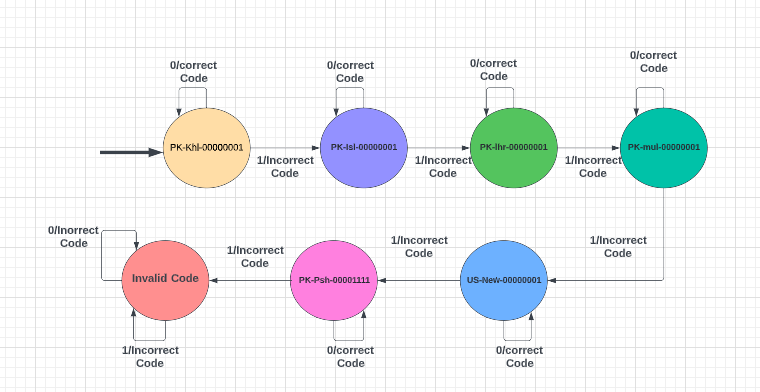

In [6]:
mealy_m3 = Mealy(['PK-Khi-00000001', 'PK-Isl-00000001', 'PK-lhr-00000001', 'PK-mul-00000001','US-New-00000001','PK-Psh-00001111','invalid code'],
                ['0', '1'],
                ['correct code', 'incorrect code'],
                {
                    'PK-Khi-00000001' : {
                        '0' : ('PK-Khi-00000001', 'correct code'),
                        '1' : ('PK-Isl-00000001', 'incorrect code')
                    },
                    'PK-Isl-00000001': {
                        '0': ('PK-Isl-00000001', 'correct code'),
                        '1': ('PK-lhr-00000001', 'incorrect code')
                    },
                    'PK-lhr-00000001': {
                        '0': ('PK-lhr-00000001', 'correct code'),
                        '1': ('PK-mul-00000001', 'incorrect code')
                    },
                    'PK-mul-00000001': {
                        '0': ('PK-mul-00000001', 'correct code'),
                        '1': ('US-New-00000001', 'incorrect code')
                    },
                    'US-New-00000001': {
                        '0': ('US-New-00000001', 'correct code'),
                        '1': ('PK-Psh-00001111', 'incorrect code')
                    },
                    'US-New-00000001': {
                        '0': ('PK-Psh-00001111', 'correct code'),
                        '1': ('invalid Code', 'incorrect code')
                    },
                    'invalid code': {
                        '0': ('invalid code', 'incorrect code'),
                        '1': ('Invalid Code', 'incorrect code')
                    }
                },
                'PK-Khi-00000001'
                )


print("======================================================= Mealy Machine 3 ===================================================")
print(mealy_m3)
print()
display.display(Image.open('3.png'))

Enter the city code 1: PK-Khi-00000001
Enter the city code 2: PK-Khi-00000011
Enter the city code 3: PK-Khi-00000111
Enter the city code 4: PK-Khi-00001111
Enter the city code 5: PK-Khi-00011111
Enter the city code 6: PK-Khi-10000001

City Codes:
Code 1: PK-Khi-00000001
Code 1: PK-Khi-00000011
Code 1: PK-Khi-00000111
Code 1: PK-Khi-00001111
Code 1: PK-Khi-00011111
Code 1: PK-Khi-10000001
======================================================= Mealy Machine 3 ===================================================


Mealy Machine
States ['PK-Khi-00000001', 'PK-Khi-00000011', 'PK-Khi-00000111', 'PK-Khi-00001111', 'PK-Khi-00011111', 'PK-Khi-10000001', 'invalid code']
Transitions {'PK-Khi-00000001': {'0': ('PK-Khi-00000001', 'correct code'), '1': ('PK-Khi-00000011', 'incorrect code')}, 'PK-Khi-00000011': {'0': ('PK-Khi-00000011', 'correct code'), '1': ('PK-Khi-00000111', 'incorrect code')}, 'PK-Khi-00000111': {'0': ('PK-Khi-00000111', 'correct code'), '1': ('PK-Khi-00001111', 'incorrect code')

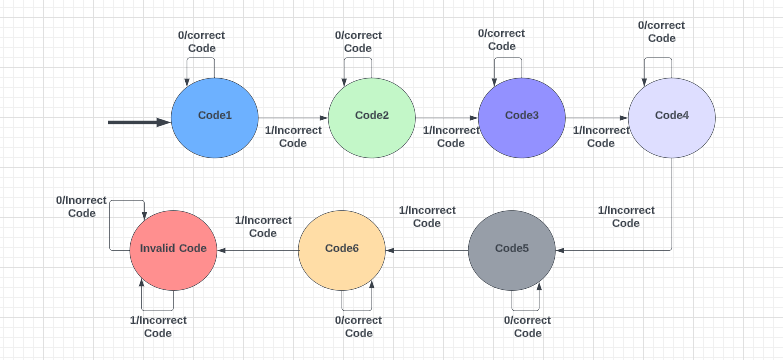

In [7]:
C1 = input("Enter the city code 1: ")
C2 = input("Enter the city code 2: ")
C3 = input("Enter the city code 3: ")
C4 = input("Enter the city code 4: ")
C5 = input("Enter the city code 5: ")
C6 = input("Enter the city code 6: ")
print("")
print("City Codes:")
print("Code 1: "+C1)
print("Code 1: "+C2)
print("Code 1: "+C3)
print("Code 1: "+C4)
print("Code 1: "+C5)
print("Code 1: "+C6)

mealy_m4 = Mealy([C1, C2, C3, C4,C5,C6,'invalid code'],
                ['0', '1'],
                ['correct code', 'incorrect code'],
                {
                    C1 : {
                        '0' : (C1, 'correct code'),
                        '1' : (C2, 'incorrect code')
                    },
                    C2: {
                        '0': (C2, 'correct code'),
                        '1': (C3, 'incorrect code')
                    },
                    C3: {
                        '0': (C3, 'correct code'),
                        '1': (C4, 'incorrect code')
                    },
                    C4: {
                        '0': (C4, 'correct code'),
                        '1': (C5, 'incorrect code')
                    },
                    C5: {
                        '0': (C5, 'correct code'),
                        '1': (C6, 'incorrect code')
                    },
                    C6: {
                        '0': (C6, 'correct code'),
                        '1': ('invalid Code', 'incorrect code')
                    },
                    'invalid code': {
                        '0': ('invalid code', 'incorrect code'),
                        '1': ('Invalid Code', 'incorrect code')
                    }
                },
                'PK-Khi-00000001'
                )



print("======================================================= Mealy Machine 3 ===================================================")
print()
print(mealy_m4)
print()

display.display(Image.open('4.png'))

In [9]:
with open('auto.txt', 'r') as file:
    data = file.read().rstrip()

if C1 in data:
    print(C1 + "  is present in text file")
else:
    print(C1 + " is not present in text file")

if C2 in data:
    print(C2 + "  is present in text file")
else:
    print(C2 + " is not present in text file")

if C3 in data:
    print(C3 + "  is present in text file")
else:
    print(C3 + " is not present in text file")

if C4 in data:
    print(C4 + "  is present in text file")
else:
    print(C4 + " is not present in text file")

if C5 in data:
    print(C5 + "  is present in text file")
else:
    print(C5 + " is not present in text file")

if C6 in data:
    print(C6 + "  is present in text file")
else:
    print(C6 + " is not present in text file")    

PK-Khi-00000001  is present in text file
PK-Khi-00000011  is present in text file
PK-Khi-00000111  is present in text file
PK-Khi-00001111  is present in text file
PK-Khi-00011111  is present in text file
PK-Khi-10000001 is not present in text file
